# Activity 7

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def img_norm(img):     # normalize an image
    img = img/255      # to avoid int limit error
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    I = R+G+B
    I = np.where(I==0, 10e10, I)  # to avoid dividing by zero (which gives a large number, so set it to a large number already)
    R_norm = R/I
    G_norm = G/I
    B_norm = B/I
    img_norm = np.dstack([R_norm,G_norm,B_norm])
    return img_norm

def gaussian_PDF(img, ROI):
    # normalize
    img_normed = img_norm(img)
    ROI_normed = img_norm(ROI)
    
    # normalized image values
    r = img_normed[:,:,0]
    g = img_normed[:,:,1]
    
    # ROI values
    ROI_r = ROI_normed[:,:,0]
    ROI_g = ROI_normed[:,:,1]
    
    # parameters from ROI values
    mu_r = np.mean(ROI_r)
    mu_g = np.mean(ROI_g)
    sigma_r = np.std(ROI_r)
    sigma_g = np.std(ROI_g)
    
    # individual probabality of normalized image to be in red and green space of ROI
    gauss_r = 1/(sigma_r*np.sqrt(2*np.pi))*np.exp(-(r-mu_r)**2/(2*sigma_r**2))
    gauss_g = 1/(sigma_g*np.sqrt(2*np.pi))*np.exp(-(g-mu_g)**2/(2*sigma_g**2))
    
    # joint probability
    return gauss_r*gauss_g

def parametric(img, ROI, thresh):
    img_gauss = gaussian_PDF(img, ROI) # get probability of image in ROI

    img_mask = img_gauss > thresh   # threshold
    r_img = img[:,:,0]*img_mask
    g_img = img[:,:,1]*img_mask
    b_img = img[:,:,2]*img_mask
    img_segmented = np.dstack((r_img,g_img,b_img))

    plt.imshow(img_segmented)

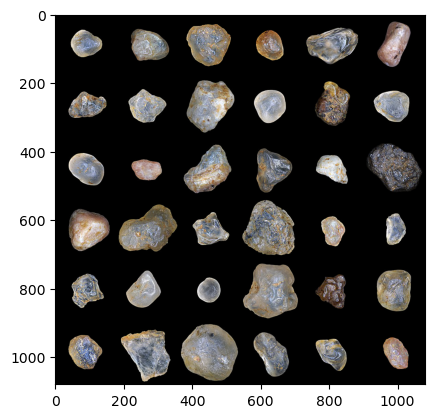

In [4]:
sand = plt.imread('sand.jpg')

sand_ROI = sand[400:500,960:1000,:]

plt.imshow(sand)

plt.imshow(sand_ROI)

parametric(sand,sand_ROI,10e-10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


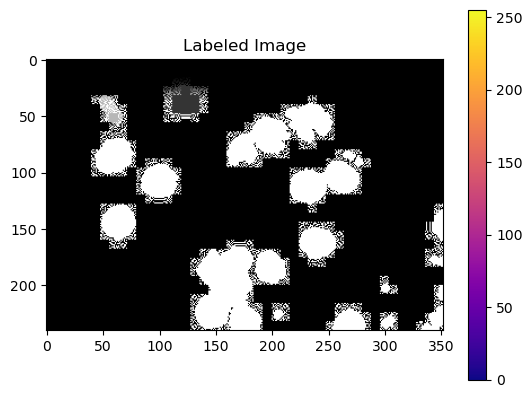

In [5]:
malaria_morphed = plt.imread('malaria_morphed_img.jpg')

plt.imshow(malaria_morphed)

from skimage.measure import label, regionprops, regionprops_table
from skimage.io import imshow

malaria_labeled = label(malaria_morphed)
malaria_regionprops = regionprops(malaria_labeled)
# imshow(malaria_regionprops)

plt.imshow(malaria_labeled, cmap='plasma')
plt.colorbar()
plt.title('Labeled Image')
plt.show()